In [ ]:
# Problem 1 import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [ ]:
# Prob 1 explore data

customer_churn = pd.read_csv('Telco-Customer-Churn.csv')
print(customer_churn.head())
# Display summary statistics
print(customer_churn.describe())

In [ ]:
# Prob 1 Clean data
def load_data():
    # Load the data
    telco = pd.read_csv("Telco-Customer-Churn.csv")
    
    # Drop unnecessary columns
    telco.drop(columns=['customerID', 'PaymentMethod'], inplace=True)

    # Filter rows
    telco = telco[(telco['InternetService'] != "No") & (telco['PhoneService'] != "No")]

    # Reset index to clean up levels after filtering
    telco.reset_index(drop=True, inplace=True)

    # Drop additional columns
    telco.drop(columns=['PhoneService', 'TotalCharges'], inplace=True)

    telco['SeniorCitizen'] = telco['SeniorCitizen'].apply(lambda x: 'True' if x == 1 else 'False')

    # Convert object columns to categorical
    for col in telco.select_dtypes(include='object').columns:
        telco[col] = telco[col].astype('category')

    # Perform one-hot encoding, dropping the first category in each variable
    telco_encoded = pd.get_dummies(telco, drop_first=True)

    return telco_encoded

# Load the data
telco = load_data()

# Display the first few rows of the dataset
print(telco.head())

# Display summary statistics
print(telco.describe())

In [ ]:
# Prob 1a
# Filter rows where 'Churn' is 'Yes'
Churned = telco[telco['Churn_Yes'] == True]

# Calculate the average monthly charges for the resulting 'Churned' DataFrame
average_monthly_charges = Churned['MonthlyCharges'].mean()

# Print the average monthly charges
print(f"Average Monthly Charges for Churned Customers: ${round(average_monthly_charges,2)}")

# Assume a 12.5% profit margin
profit_margin = 0.125

# Calculate the expected cost of losing one customer (Cost 1)
cost_1 = average_monthly_charges * profit_margin

# Print the expected cost of losing one customer
print(f"Expected Cost of Losing One Customer (Cost 1): ${round(cost_1,2)}")


In [ ]:
#prob 1b
current_customer = telco[telco['Churn_Yes'] == False]

# Calculate the average monthly charges for the resulting 'current customers' DataFrame
current_customer_average_monthly_charges = current_customer['MonthlyCharges'].mean()

# Print the average monthly charges
print(f"Average Monthly Charges for current Customers: ${round(current_customer_average_monthly_charges,2)}")

# Assume a 12.5% profit margin
profit_margin_retained_customers = 0.075

# Calculate the expected cost of losing one customer (Cost 1)
cost_2 = current_customer_average_monthly_charges * profit_margin_retained_customers

# Print the expected cost of losing one customer
print(f"Expected Cost of Losing One Customer (Cost 2): ${round(cost_2,2)}")

In [ ]:
# Prob 1c

# Convert boolean columns to integers (0 and 1)
bool_columns = telco.select_dtypes(include=['bool']).columns
telco[bool_columns] = telco[bool_columns].astype(int)

# Define predictor variables and response variable
X = telco.drop(columns=['Churn_Yes'])  # Predictor variables (all columns except 'Churn')
y = telco['Churn_Yes']  # Response variable

# Add a constant to the predictor variables (intercept term)
X_with_intercept = sm.add_constant(X)

# Fit the logistic regression model
logit_model = sm.GLM(y, X_with_intercept, family=sm.families.Binomial()).fit()

# Print the summary of the model
print(logit_model.summary())

ypred = (logit_model.predict(X_with_intercept) > 0.5)

# Calculate false negatives (FN) and false positives (FP)
FN = ((y == True) & (ypred == False)).sum()
FP = ((y == False) & (ypred == True)).sum()

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y, ypred)

# Create a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=['True Neg-', 'True Pos+'], columns=['Pred Neg-', 'Pred Pos+'])

# Print the confusion matrix
print(conf_matrix_df)

# Loss=Cost 1∗FN+Cost 2∗FP
# I disagree with Cost 2. It should be 5%, since that is the lost revenue due to the unecessary discount. 7.5% is the profit margin of the retain customer.

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Churn_Yes   No. Observations:                 4835
Model:                            GLM   Df Residuals:                     4817
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2328.9
Date:                Thu, 21 Nov 2024   Deviance:                       4657.8
Time:                        22:46:58   Pearson chi2:                 5.08e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2608
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [ ]:
# Prob 1d
def calculate_loss(y_pred_i, y):
    FN = ((y == True) & (y_pred_i == False)).sum()
    FP = ((y == False) & (y_pred_i == True)).sum()
    return cost_1*FN + cost_2*FP

# Calculate loss for 1000 evenly distributed thresholds
thresholds = np.arange(0.0, 1.0, .001)
losses = []

for threshold in thresholds:
    y_pred_i = (logit_model.predict(X_with_intercept) > threshold)
    loss = calculate_loss(y_pred_i, y)
    losses.append(loss)

print(losses)
# Find the optimal threshold
optimal_threshold = thresholds[np.argmin(losses)]
print(f"Optimal Threshold: {optimal_threshold}")

# Plot the loss with respect to the threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, losses, marker='o', markersize=2)
plt.xlabel('Threshold')
plt.ylabel('Loss (FN + FP)')
plt.title('Loss with Respect to Threshold')
plt.grid(True)
plt.show()

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare
0         0       3    male  22.0      1      0   7.2500
1         1       1  female  38.0      1      0  71.2833
2         1       3  female  26.0      0      0   7.9250
3         1       1  female  35.0      1      0  53.1000
4         0       3    male  35.0      0      0   8.0500


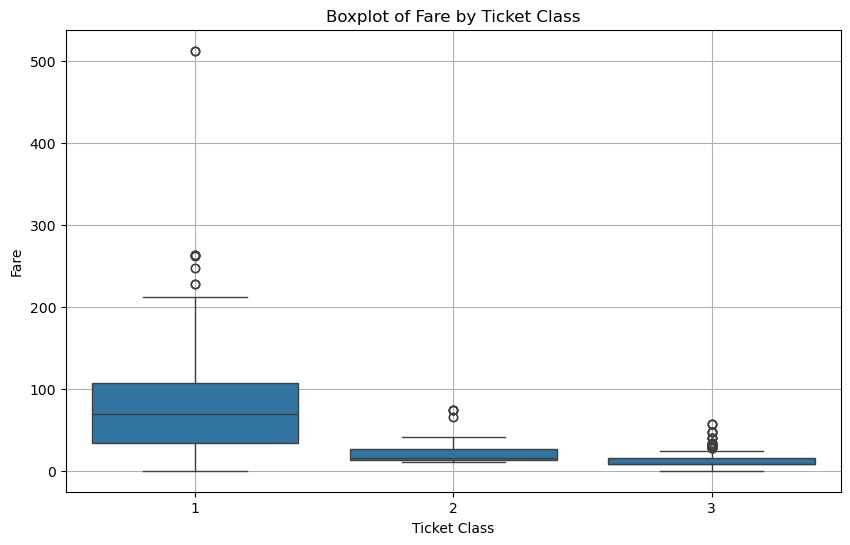

In [85]:
# Prob 2-a
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
titanic = pd.read_csv('titanic-1.csv')

# Display the first few rows of the dataset
print(titanic.head())

# Create a boxplot of Fare grouped by Pclass
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=titanic)
plt.xlabel('Ticket Class')
plt.ylabel('Fare')
plt.title('Boxplot of Fare by Ticket Class')
plt.grid(True)
plt.show()

In [86]:
# Prob 2-b
# Create a confusion matrix for Sex and Survived variables
conf_matrix_sex_survived = pd.crosstab(titanic['Sex'], titanic['Survived'])

# Print the confusion matrix for Sex and Survived
print("Confusion Matrix for Sex and Survived:")
print(conf_matrix_sex_survived)

# Create a confusion matrix for Pclass and Survived variables
conf_matrix_pclass_survived = pd.crosstab(titanic['Pclass'], titanic['Survived'])

# Print the confusion matrix for Pclass and Survived
print("\nConfusion Matrix for Pclass and Survived:")
print(conf_matrix_pclass_survived)

# The lower the ticket price / fare, the less probable of surviving. Also women had a higher chance of surviving that men. Then Jack, who had a low ticket and was a men was fucked

Confusion Matrix for Sex and Survived:
Survived    0    1
Sex               
female     64  197
male      360   93

Confusion Matrix for Pclass and Survived:
Survived    0    1
Pclass            
1          64  122
2          90   83
3         270   85


In [87]:
# 2-c
# Transform Pclass into a factor (categorical) variable
titanic_cat = titanic.copy()
titanic_cat['Pclass'] = titanic_cat['Pclass'].astype('category')
titanic_cat = pd.get_dummies(titanic_cat, drop_first=True)
bool_columns = titanic_cat.select_dtypes(include='bool').columns
titanic_cat[bool_columns] = titanic_cat[bool_columns].astype(int)

# Verify the transformation
print(titanic_cat.dtypes)

# Define predictor variables and response variable
X = titanic_cat.drop(columns=['Survived'])  # Predictor variables (all columns except 'Survived')
y = titanic_cat['Survived']  # Response variable

# Add a constant to the predictor variables (intercept term)
X_with_intercept = sm.add_constant(X)

# Fit the logistic regression model
logit_model = sm.GLM(y, X_with_intercept, family=sm.families.Binomial()).fit()
print(logit_model.summary())

coefficients = logit_model.params
pclass_coefficients = coefficients.filter(like="Pclass")

# Calculating odds ratios
odds_ratios = np.exp(pclass_coefficients)

# Formatting results for interpretation
pclass_odds_ratios = odds_ratios.to_frame(name="Odds Ratio")
print(pclass_odds_ratios)

# Interpretation of the Odds Ratios for Pclass
# Pclass_2 (Odds Ratio = 0.275): Passengers in Pclass_2 have 0.275 times the odds of survival compared to those in the baseline class (Pclass_1). This means their odds of survival are reduced by approximately 72.5% relative to the baseline.
# Pclass_3 (Odds Ratio = 0.082): Passengers in Pclass_3 have 0.082 times the odds of survival compared to those in the baseline class (Pclass_1). This indicates a significant reduction in survival odds by approximately 91.8% relative to the baseline.#

Survived      int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Pclass_2      int64
Pclass_3      int64
Sex_male      int64
dtype: object
                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      706
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -317.89
Date:                Fri, 22 Nov 2024   Deviance:                       635.78
Time:                        00:07:01   Pearson chi2:                     749.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3690
Covariance Type:            nonrobust                                         
                 coef    std err    

In [98]:

# Problem 2-d
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# 4 Prepar X and Y# Split data
titanic_shuffled = titanic.copy().sample(frac=1, random_state=42).reset_index(drop=True)

# Define predictor variables and response variable
titanic_shuffled['Pclass'] = titanic_shuffled['Pclass'].astype('category')
titanic_shuffled = pd.get_dummies(titanic_shuffled, drop_first=True)
bool_columns = titanic_shuffled.select_dtypes(include='bool').columns
titanic_shuffled[bool_columns] = titanic_shuffled[bool_columns].astype(int)
X = titanic_shuffled.drop(columns=['Survived'])  # Predictor variables (all columns except 'Survived')
y = titanic_shuffled['Survived']  # Response variable

# Split the data into training and testing sets
train_size = int(0.75 * len(titanic_shuffled))
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

# Display the sizes of the training and testing sets
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# Add a constant to the predictor variables (intercept term)
X_train_with_intercept = sm.add_constant(X_train)
X_test_with_intercept = sm.add_constant(X_test)

# Fit the logistic regression model
logit_model = sm.GLM(y_train, X_train_with_intercept, family=sm.families.Binomial()).fit()

y_test_pred = (logit_model.predict(X_test_with_intercept) > 0.5)

# Create a confusion matrix of your classification and the true survival status
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Create a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix_df)

# Calculate sensitivity and specificity
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Print sensitivity and specificity
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")

Training set size: 535
Testing set size: 179
Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           96           11
Actual 1           19           53
Sensitivity: 0.7361
Specificity: 0.8972


In [ ]:
# 4A with Stats Model
try:
    mnlogit_model = sm.MNLogit(y_train_numeric, X_train_scaled_with_intercept).fit()
    # Display the model summary
    print(mnlogit_model.summary())
except Exception as e:
    print(f"An error occurred while fitting the model: {e}")


An error occurred while fitting the model: module 'statsmodels.genmod.families' has no attribute 'Multinomial'


In [ ]:
# 4A with Stats Model
try:
    mnlogit_model = sm.MNLogit(y_train_numeric, X_train_scaled_with_intercept).fit()
    # Display the model summary
    print(mnlogit_model.summary())
except Exception as e:
    print(f"An error occurred while fitting the model: {e}")


An error occurred while fitting the model: module 'statsmodels.genmod.families' has no attribute 'Multinomial'


In [ ]:
# Problem 4 import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve



In [ ]:
# Prob 4 explore data

letters = pd.read_csv('letters-2.csv')
print(letters.dtypes)
print(letters.head())

# Display summary statistics
print(letters.describe())

In [ ]:
# 4 Prepar X and Y
# Split data
letters_shuffled = letters.copy().sample(frac=1, random_state=42).reset_index(drop=True)
train_size = int(0.75 * len(letters_shuffled))
train_set = letters_shuffled[:train_size]
test_set = letters_shuffled[train_size:]

# Display the sizes of the training and testing sets
print(f"Training set size: {train_set.shape[0]}")
print(f"Testing set size: {test_set.shape[0]}")

# Define predictor variables and response variable
X_train = train_set.drop(columns=['lettr'])  # Predictor variables (all columns except 'lettr')
y_train = train_set['lettr']  # Response variable
y_train_numeric = y_train.astype('category').cat.codes  # Encode categorical target

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled_with_intercept = sm.add_constant(X_train_scaled)

In [ ]:
# 4A with Stats Model
try:
    mnlogit_model = sm.MNLogit(y_train_numeric, X_train_scaled_with_intercept).fit()
    # Display the model summary
    print(mnlogit_model.summary())
except Exception as e:
    print(f"An error occurred while fitting the model: {e}")


An error occurred while fitting the model: module 'statsmodels.genmod.families' has no attribute 'Multinomial'


In [ ]:
# 4a - SK learn fit model
sk_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
sk_model.fit(X_train_scaled, y_train)

coefficients = sk_model.coef_  # Shape: (n_classes, n_features)
intercepts = sk_model.intercept_  # Shape: (n_classes,)

# Classes and shape details
print(f"Classes: {sk_model.classes_}")
print(f"Number of features: {X_train_scaled.shape[1]}")
print(f"Number of classes: {len(sk_model.classes_)}")

# Coefficients
print("Coefficients (one row per class):")
print(coefficients)

# Intercepts
print("Intercepts (one per class):")
print(intercepts)


In [ ]:
#4b
# Predict the letters for the training set
train_pred = sk_model.predict(X_train_scaled)

# Display the first few predictions
print(train_pred[:10])

# Create the confusion matrix
conf_matrix = confusion_matrix(y_train, train_pred)

# Create a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=sk_model.classes_, columns=sk_model.classes_)

print(conf_matrix_df)

# Calculate classification accuracy by summing the diagonal elements and dividing by the total number of samples
correct_classifications = np.trace(conf_matrix)  # Sum of diagonal elements
total_classifications = np.sum(conf_matrix)  # Total number of samples
accuracy_manual = correct_classifications / total_classifications

print(f"Classification Accuracy (manual calculation): {accuracy_manual:.4f}")

# Calculate classification accuracy using sklearn's accuracy_score for comparison
accuracy_sklearn = accuracy_score(y_train, train_pred)
print(f"Classification Accuracy (sklearn): {accuracy_sklearn:.4f}")

In [ ]:
# 4c
# Define predictor variables and response variable
X_test = test_set.drop(columns=['lettr'])  # Predictor variables (all columns except 'lettr')
y_test = test_set['lettr']  # Response variable

scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)
# Predict the letters for the training set
test_pred = sk_model.predict(X_test_scaled)

# Display the first few predictions
print(test_pred[:10])

# Calculate classification accuracy using sklearn's accuracy_score for comparison
accuracy_sklearn = accuracy_score(y_test, test_pred)
print(f"Classification Accuracy (sklearn) test: {accuracy_sklearn:.4f}")

In [ ]:
# 4d

# Prepare the full dataset
full_set = letters.copy()

# Display the sizes of the training and testing sets
print(f"Training set size: {full_set.shape[0]}")
print(f"Testing set size: {full_set.shape[0]}")

# Define predictor variables and response variable
X = full_set.drop(columns=['lettr'])  # Predictor variables (all columns except 'lettr')
y = full_set['lettr']  # Response variable

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train a logistic regression model (multinomial)
model_full = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
model_full.fit(X_scaled, y)

# Read data and predict
top_secret = pd.read_csv('topsecret-1.csv')

# Ensure the top_secret dataset has the same columns and preprocess it
X_top_secret = top_secret[X.columns]  # Ensure the same columns as X
X_top_secret_scaled = scaler.transform(X_top_secret)  # Use the same scaler as training

# Predict on the top_secret dataset
pred = model_full.predict(X_top_secret_scaled)

# Display predictions
print("Predictions for top_secret dataset:")
print(pred)